In [1]:
import pandas as pd
import numpy as np

In [2]:
churn_data = pd.read_csv('train.csv')
print(churn_data.shape)

churn_data.head()

(4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# The Target Feature

In [3]:
churn_data['churn'].value_counts() / len(churn_data)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

# The Variable Types

In [4]:
numerical_features = [feature for feature in churn_data.columns if churn_data[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  15
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [5]:
categorical_features = [feature for feature in churn_data.columns if feature not in numerical_features and feature != 'churn']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  4
['state', 'area_code', 'international_plan', 'voice_mail_plan']


## Adding new col: area_code_num

In [6]:
churn_data['area_code_num'] = churn_data['area_code'].apply(lambda x: int(x[-3:]))

# train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(churn_data.drop(['churn', 'state'], axis = 1),
                                                   churn_data['churn'],
                                                   test_size=0.3,
                                                   random_state=12)

# Categorical Features

In [8]:
from feature_engine.encoding import OneHotEncoder
categorical_features.remove('state')
encoder = OneHotEncoder(variables=categorical_features)
encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [9]:
print(X_train.shape)
X_train.head()

(2975, 23)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,area_code_num,area_code_area_code_510,area_code_area_code_415,area_code_area_code_408,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
4109,172,0,290.5,123,49.39,253.0,77,21.51,159.3,96,...,3.05,2,510,1,0,0,1,0,1,0
4170,114,23,186.2,95,31.65,258.3,129,21.96,183.9,93,...,2.11,0,415,0,1,0,1,0,0,1
2773,115,0,200.2,92,34.03,244.9,107,20.82,190.9,96,...,2.38,1,415,0,1,0,1,0,1,0
2007,101,0,217.7,118,37.01,231.7,128,19.69,185.3,128,...,0.00,3,415,0,1,0,1,0,1,0
366,135,27,273.4,141,46.48,154.0,99,13.09,245.8,112,...,3.32,1,510,1,0,0,1,0,0,1


# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)

# columns = X_train.columns.to_list()

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Encoding Target feature

In [11]:
def encode_target(value):
    target_dict = {'yes': 1, 'no': 0}
    
    return target_dict[value]

In [12]:
y_train.head()

4109    yes
4170     no
2773     no
2007     no
366      no
Name: churn, dtype: object

In [13]:
y_train = y_train.apply(lambda x: encode_target(x))
y_train = np.array(y_train)

In [14]:
y_test

1168    yes
3603     no
3894     no
3739     no
1653     no
       ... 
1066     no
3171     no
4187     no
2340     no
416      no
Name: churn, Length: 1275, dtype: object

In [15]:
y_test = y_test.apply(lambda x: encode_target(x))
y_test = np.array(y_test)

# Model Building

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [17]:
X_train.shape

(2975, 23)

In [22]:
model = Sequential()

model.add(Dense(23, activation='relu'))
model.add(Dense(12, activation='relu'))
# model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x = X_train, y = y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 32)

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 0.5034 - accuracy: 0.8064 - val_loss: 0.4095 - val_accuracy: 0.8533
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3621 - accuracy: 0.8618 - val_loss: 0.3476 - val_accuracy: 0.8541
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8676 - val_loss: 0.3192 - val_accuracy: 0.8604
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2858 - accuracy: 0.8766 - val_loss: 0.3031 - val_accuracy: 0.8722
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2682 - accuracy: 0.8854 - val_loss: 0.2909 - val_accuracy: 0.8800
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.8978 - val_loss: 0.2801 - val_accuracy: 0.8910
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.9109 - val_loss: 0.2715 - val_accuracy: 0.8973
Epoch 8/100
9

Epoch 59/100
93/93 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9661 - val_loss: 0.2451 - val_accuracy: 0.9286
Epoch 60/100
93/93 [==============================] - 0s 5ms/step - loss: 0.1153 - accuracy: 0.9694 - val_loss: 0.2397 - val_accuracy: 0.9302
Epoch 61/100
93/93 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9657 - val_loss: 0.2468 - val_accuracy: 0.9310
Epoch 62/100
93/93 [==============================] - 0s 5ms/step - loss: 0.1131 - accuracy: 0.9671 - val_loss: 0.2393 - val_accuracy: 0.9302
Epoch 63/100
93/93 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9674 - val_loss: 0.2448 - val_accuracy: 0.9341
Epoch 64/100
93/93 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.9677 - val_loss: 0.2414 - val_accuracy: 0.9302
Epoch 65/100
93/93 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 0.9691 - val_loss: 0.2407 - val_accuracy: 0.9318
Epoch 

<AxesSubplot:>

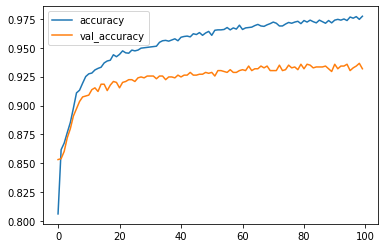

In [23]:
losses = pd.DataFrame(model.history.history)

losses[['accuracy', 'val_accuracy']].plot()

# Score New Data

In [24]:
churn_data_test = pd.read_csv('test.csv')
print(churn_data.shape)

churn_data_test.head()

(4250, 21)


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## The Target Feature

In [25]:
churn_data_test = churn_data_test.drop(['id', 'state'], axis = 1)
churn_data_test['area_code_num'] = churn_data_test['area_code'].apply(lambda x: int(x[-3:]))

In [26]:
churn_data_test.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_num
0,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,415
1,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,510
2,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,415
3,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,510
4,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,415


In [27]:
churn_data_test = encoder.transform(churn_data_test)

In [28]:
churn_data_test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,area_code_num,area_code_area_code_510,area_code_area_code_415,area_code_area_code_408,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,415,0,1,0,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,1.70,0,510,1,0,0,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,...,3.54,4,415,0,1,0,1,0,1,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,...,2.19,3,510,1,0,0,1,0,1,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,...,4.19,3,415,0,1,0,1,0,1,0


In [29]:
churn_data_test = scaler.transform(churn_data_test)

In [30]:
churn_data_test

array([[ 0.71118121,  1.27341293,  1.57924352, ..., -0.32423186,
        -1.65736278,  1.65736278],
       [ 0.45539775, -0.57476907,  0.8038017 , ...,  3.08421262,
         0.6033682 , -0.6033682 ],
       [-0.97698968, -0.57476907, -1.10597945, ..., -0.32423186,
         0.6033682 , -0.6033682 ],
       ...,
       [ 1.32506154, -0.57476907,  0.07484921, ..., -0.32423186,
         0.6033682 , -0.6033682 ],
       [-1.00256802, -0.57476907, -0.73592449, ..., -0.32423186,
         0.6033682 , -0.6033682 ],
       [ 0.22519263, -0.57476907,  0.16038955, ..., -0.32423186,
         0.6033682 , -0.6033682 ]])

## Predictions

In [34]:
new_data_preds = model.predict(churn_data_test)

In [35]:
new_data_preds

array([[6.79764431e-03],
       [1.00523391e-06],
       [2.09876001e-01],
       [1.73272174e-02],
       [3.87325454e-05],
       [7.40052317e-04],
       [4.07720009e-08],
       [9.77322707e-05],
       [3.23429322e-06],
       [6.66756034e-01],
       [9.44321275e-01],
       [6.31778559e-04],
       [1.93216046e-03],
       [1.04956083e-01],
       [2.95227747e-02],
       [1.12153264e-03],
       [3.30534123e-04],
       [2.14532763e-03],
       [4.14786208e-03],
       [1.78586144e-03],
       [1.88593240e-03],
       [2.37249210e-02],
       [1.43618479e-01],
       [1.81522302e-03],
       [2.97182915e-03],
       [3.95691954e-04],
       [9.81385767e-01],
       [1.64865516e-04],
       [1.54097050e-01],
       [1.08616624e-03],
       [2.89619697e-04],
       [1.55371651e-01],
       [1.28088507e-03],
       [2.04986357e-03],
       [2.57241278e-04],
       [5.67614858e-04],
       [7.09654472e-04],
       [9.52566803e-01],
       [2.63607432e-03],
       [8.37349653e-01],


In [41]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

## Saving results

In [ ]:
sample_submission = pd.read_csv('sampleSubmission.csv')
print(sample_submission.shape)
sample_submission.head()

In [ ]:
def decode_target(value):
    target_dict = {1: 'yes', 0: 'no'}
    
    return target_dict[value]

In [ ]:
new_data_preds = new_data_preds.apply(lambda x: str(decode_target(x)))

In [ ]:
new_data_preds.head()

In [ ]:
sample_submission['churn'] = new_data_preds

In [ ]:
sample_submission.head()

In [ ]:
sample_submission.to_csv('sampleSubmission.csv', index = False)